In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [2]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classifying
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001, rho=0.9), metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
from keras.preprocessing.image import ImageDataGenerator
import keras

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 10:
        lrate = 0.0005
    if epoch > 20:
        lrate = 0.0001
    return lrate

checkpoint = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
# 20번의 연속적인 epoch 동안 개선이 없을 때 학습이 중단되도록 함
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [6]:
from keras.callbacks import LearningRateScheduler

# 학습률 갈수록 작게 조정 버전
history = model.fit(train_images, train_labels, batch_size=128, epochs=30,  validation_split=0.1,
                    callbacks = [checkpoint, early_stopping, LearningRateScheduler(lr_schedule)])

Epoch 1/30
352/352 [==============================] - 19s 20ms/step - loss: 1.7692 - acc: 0.3960 - val_loss: 2.2219 - val_acc: 0.2428 - lr: 0.0010
Epoch 2/30
352/352 [==============================] - 7s 19ms/step - loss: 1.2568 - acc: 0.5568 - val_loss: 1.0115 - val_acc: 0.6408 - lr: 0.0010
Epoch 3/30
352/352 [==============================] - 6s 18ms/step - loss: 1.0749 - acc: 0.6259 - val_loss: 0.9860 - val_acc: 0.6688 - lr: 0.0010
Epoch 4/30
352/352 [==============================] - 6s 18ms/step - loss: 0.9783 - acc: 0.6605 - val_loss: 1.0446 - val_acc: 0.6530 - lr: 0.0010
Epoch 5/30
352/352 [==============================] - 6s 18ms/step - loss: 0.9164 - acc: 0.6837 - val_loss: 0.7689 - val_acc: 0.7336 - lr: 0.0010
Epoch 6/30
352/352 [==============================] - 6s 18ms/step - loss: 0.8696 - acc: 0.7010 - val_loss: 1.3201 - val_acc: 0.6332 - lr: 0.0010
Epoch 7/30
352/352 [==============================] - 6s 17ms/step - loss: 0.8221 - acc: 0.7177 - val_loss: 0.8421 - val_ac

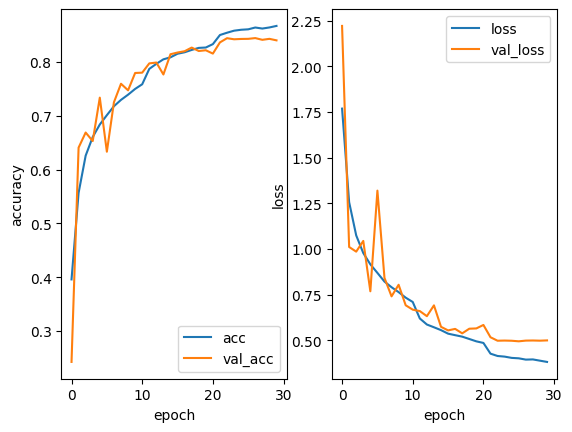

313/313 - 1s - loss: 0.5215 - acc: 0.8347 - 1s/epoch - 4ms/step


In [7]:
import matplotlib.pyplot as plt

plt.figure()

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
from keras.models import load_model

model.save('CNN_CIFAR10.h5')
model = load_model('CNN_CIFAR10.h5')